sonar dataset using logistic regression and some other classification methd mailnly we will use binary classification


In [245]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [246]:
data = pd.read_csv("sonar.csv")

In [247]:
data

,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,...,v52,v53,v54,v55,v56,v57,v58,v59,v60,v61
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157,M
204,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067,M
205,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031,M
206,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048,M


In [248]:
data.shape

(208, 61)

In [249]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
v1,208.0,0.029164,0.022991,0.0015,0.013350,0.02280,0.035550,0.1371
v2,208.0,0.038437,0.032960,0.0006,0.016450,0.03080,0.047950,0.2339
v3,208.0,0.043832,0.038428,0.0015,0.018950,0.03430,0.057950,0.3059
v4,208.0,0.053892,0.046528,0.0058,0.024375,0.04405,0.064500,0.4264
v5,208.0,0.075202,0.055552,0.0067,0.038050,0.06250,0.100275,0.4010
v6,208.0,0.104570,0.059105,0.0102,0.067025,0.09215,0.134125,0.3823
v7,208.0,0.121747,0.061788,0.0033,0.080900,0.10695,0.154000,0.3729
v8,208.0,0.134799,0.085152,0.0055,0.080425,0.11210,0.169600,0.4590
v9,208.0,0.178003,0.118387,0.0075,0.097025,0.15225,0.233425,0.6828
v10,208.0,0.208259,0.134416,0.0113,0.111275,0.18240,0.268700,0.7106


In [250]:
data.isnull().sum()

v1     0
v2     0
v3     0
v4     0
v5     0
      ..
v57    0
v58    0
v59    0
v60    0
v61    0
Length: 61, dtype: int64

there is no null values so we can go furter checking correlations of the data

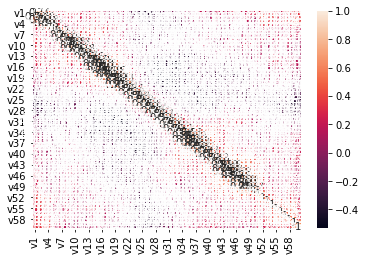

In [251]:
sns.heatmap(data.corr(), annot = True)

since there are many columnswe can reate correlation 

In [252]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 61 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   v1      208 non-null    float64
 1   v2      208 non-null    float64
 2   v3      208 non-null    float64
 3   v4      208 non-null    float64
 4   v5      208 non-null    float64
 5   v6      208 non-null    float64
 6   v7      208 non-null    float64
 7   v8      208 non-null    float64
 8   v9      208 non-null    float64
 9   v10     208 non-null    float64
 10  v11     208 non-null    float64
 11  v12     208 non-null    float64
 12  v13     208 non-null    float64
 13  v14     208 non-null    float64
 14  v15     208 non-null    float64
 15  v16     208 non-null    float64
 16  v17     208 non-null    float64
 17  v18     208 non-null    float64
 18  v19     208 non-null    float64
 19  v20     208 non-null    float64
 20  v21     208 non-null    float64
 21  v22     208 non-null    float64
 22  v2

because there are more coumns in the dataset we can roughly relate correlation but not detailly 

and also there are we cant see the target variable because the taret variable is in stringclass so lets change it into numericl variable for further use

In [253]:
data.rename(columns={"v61" : "class"}, inplace=True)

In [254]:
data.sample(5)

,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,...,v52,v53,v54,v55,v56,v57,v58,v59,v60,class
161,0.0305,0.0363,0.0214,0.0227,0.0456,0.0665,0.0939,0.0972,0.2535,0.3127,...,0.0200,0.0070,0.0070,0.0086,0.0089,0.0074,0.0042,0.0055,0.0021,M
188,0.0089,0.0274,0.0248,0.0237,0.0224,0.0845,0.1488,0.1224,0.1569,0.2119,...,0.0096,0.0103,0.0093,0.0025,0.0044,0.0021,0.0069,0.0060,0.0018,M
148,0.0712,0.0901,0.1276,0.1497,0.1284,0.1165,0.1285,0.1684,0.1830,0.2127,...,0.0154,0.0156,0.0054,0.0030,0.0048,0.0087,0.0101,0.0095,0.0068,M
58,0.0225,0.0019,0.0075,0.0097,0.0445,0.0906,0.0889,0.0655,0.1624,0.1452,...,0.0034,0.0129,0.0100,0.0044,0.0057,0.0030,0.0035,0.0021,0.0027,R
196,0.0050,0.0017,0.0270,0.0450,0.0958,0.0830,0.0879,0.1220,0.1977,0.2282,...,0.0165,0.0056,0.0010,0.0027,0.0062,0.0024,0.0063,0.0017,0.0028,M


In [255]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
data["class"] = encoder.fit_transform(data["class"])


In [256]:
data.sample(5)

,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,...,v52,v53,v54,v55,v56,v57,v58,v59,v60,class
125,0.0228,0.0853,0.1000,0.0428,0.1117,0.1651,0.1597,0.2116,0.3295,0.3517,...,0.0172,0.0191,0.0260,0.0140,0.0125,0.0116,0.0093,0.0012,0.0036,0
202,0.0272,0.0378,0.0488,0.0848,0.1127,0.1103,0.1349,0.2337,0.3113,0.3997,...,0.0091,0.0045,0.0043,0.0043,0.0098,0.0054,0.0051,0.0065,0.0103,0
71,0.0036,0.0078,0.0092,0.0387,0.0530,0.1197,0.1243,0.1026,0.1239,0.0888,...,0.0119,0.0055,0.0035,0.0036,0.0004,0.0018,0.0049,0.0024,0.0016,1
22,0.0099,0.0484,0.0299,0.0297,0.0652,0.1077,0.2363,0.2385,0.0075,0.1882,...,0.0173,0.0149,0.0115,0.0202,0.0139,0.0029,0.0160,0.0106,0.0134,1
139,0.0164,0.0627,0.0738,0.0608,0.0233,0.1048,0.1338,0.0644,0.1522,0.0780,...,0.0258,0.0143,0.0226,0.0187,0.0185,0.0110,0.0094,0.0078,0.0112,0


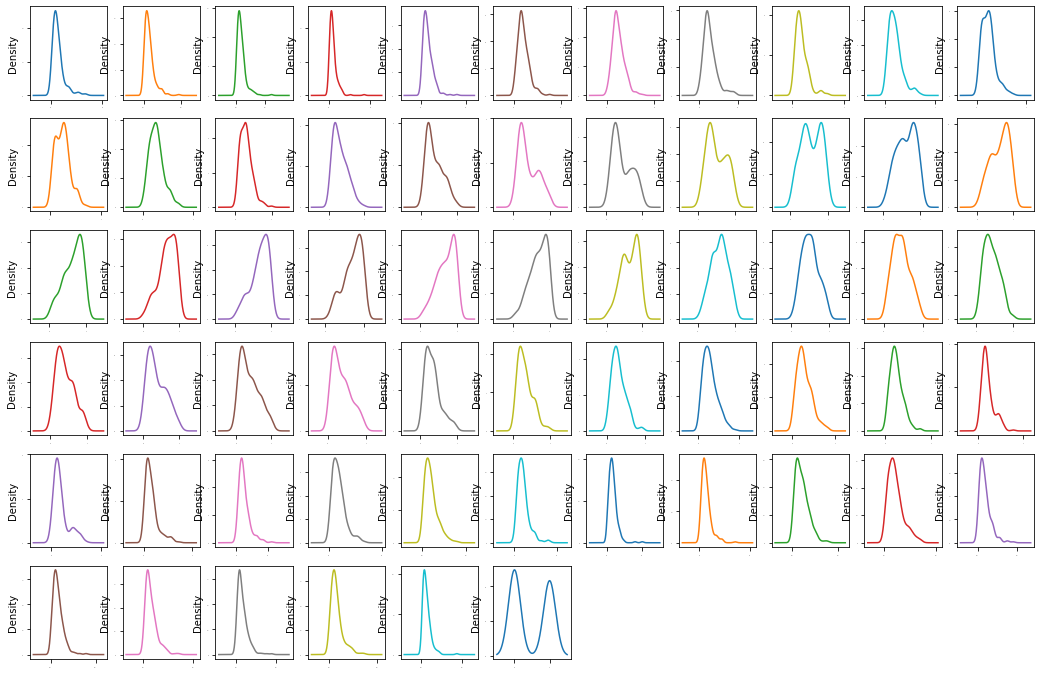

In [257]:
data.plot(kind = 'density', subplots = True, layout = (6,11), sharex = False, legend = False, fontsize = 1, figsize = (18,12))
plt.show()

there is some skewness in the data we will se them in the distplot below

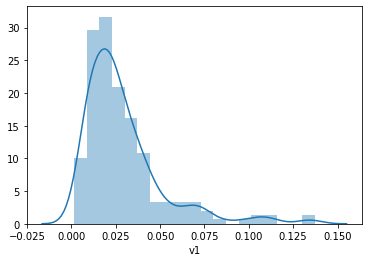

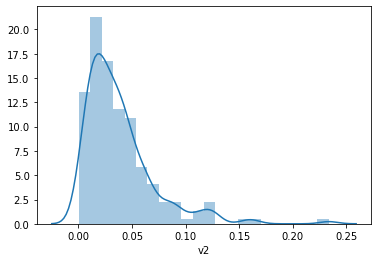

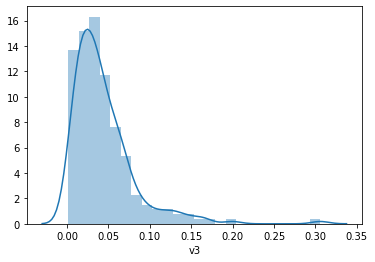

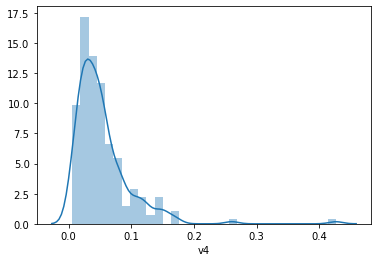

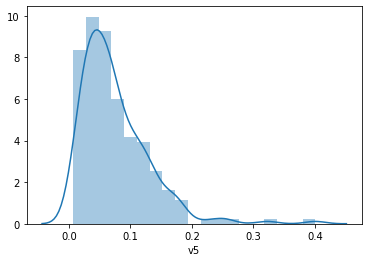

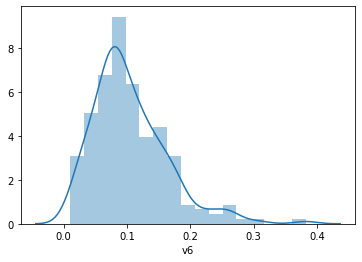

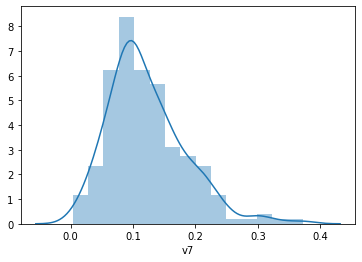

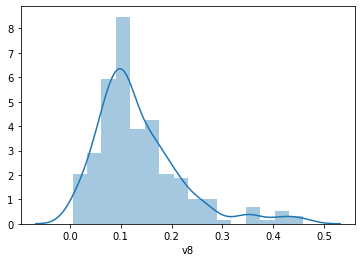

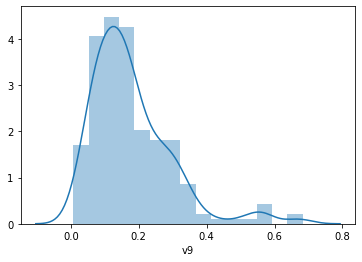

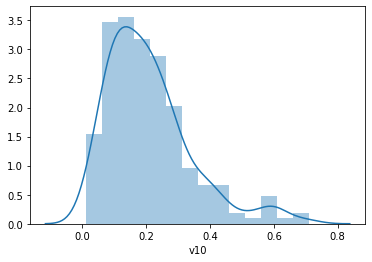

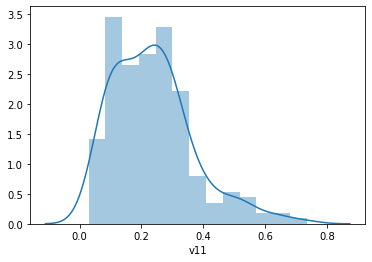

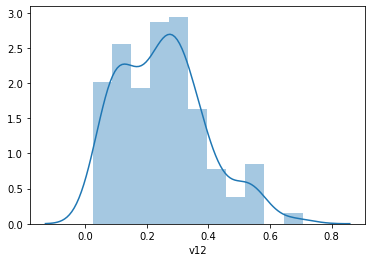

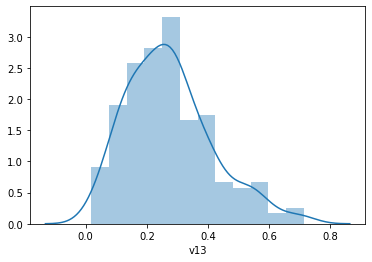

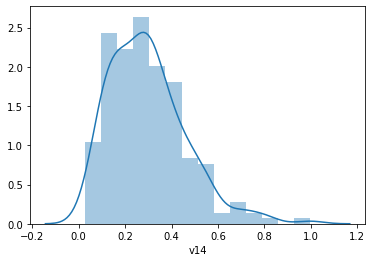

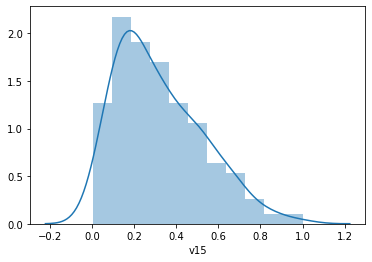

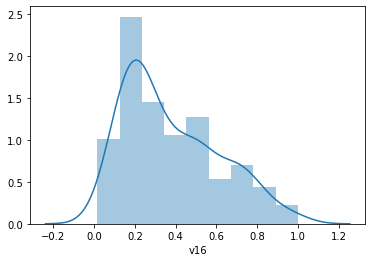

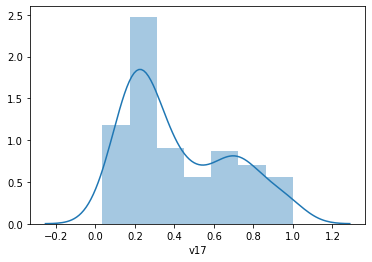

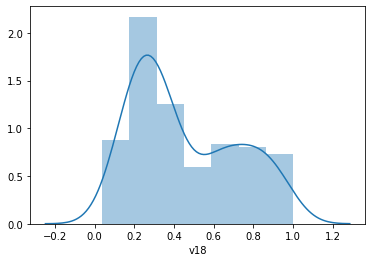

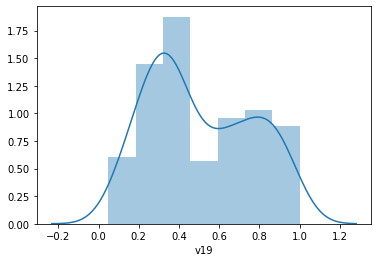

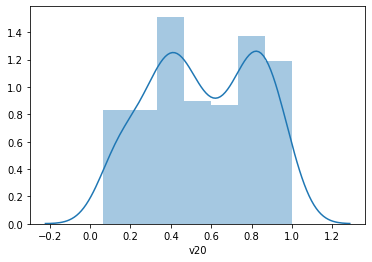

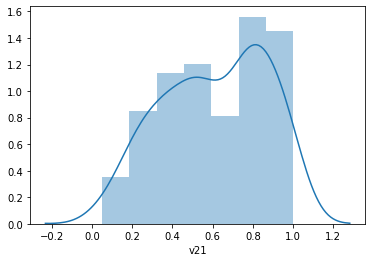

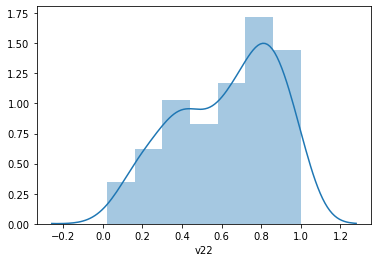

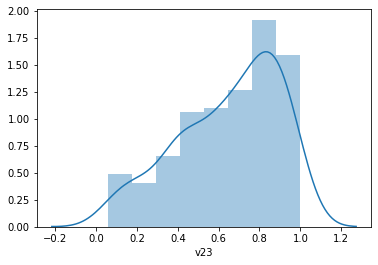

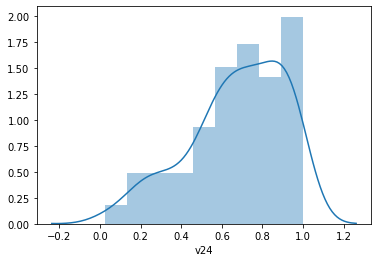

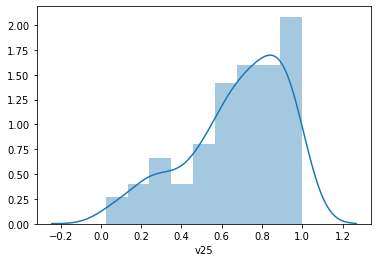

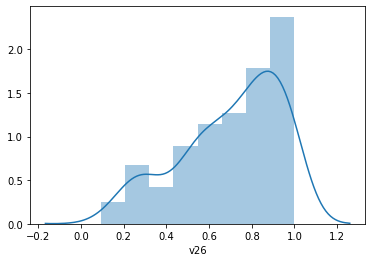

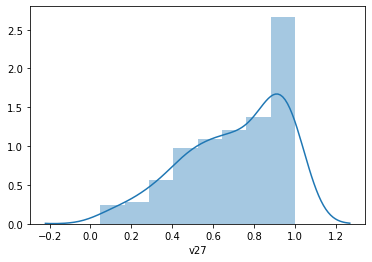

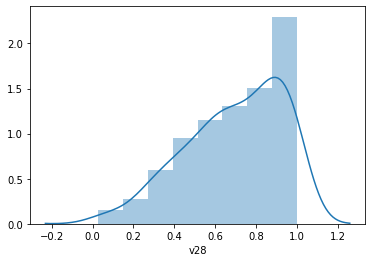

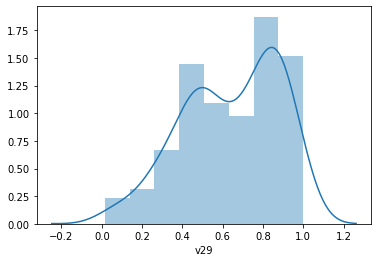

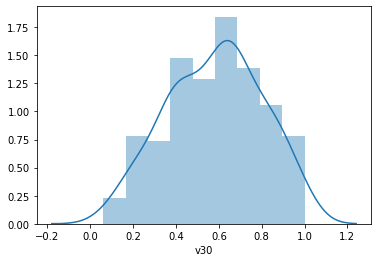

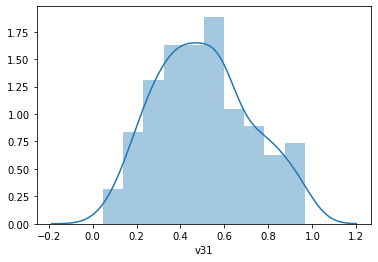

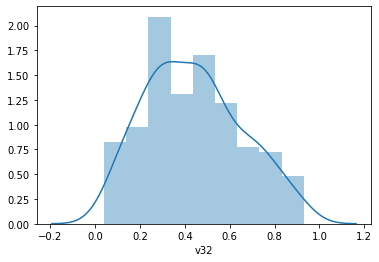

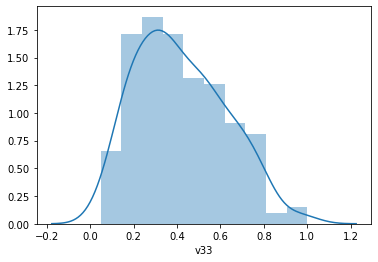

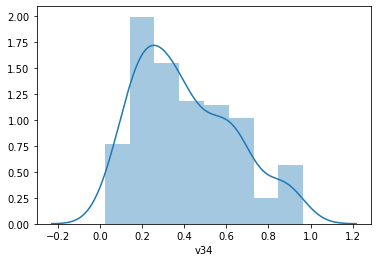

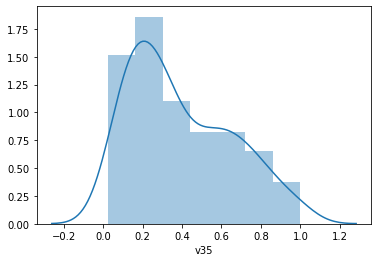

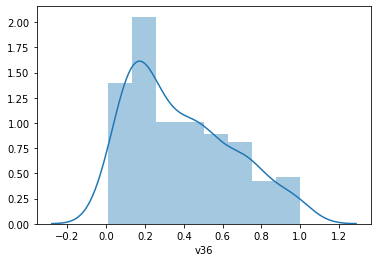

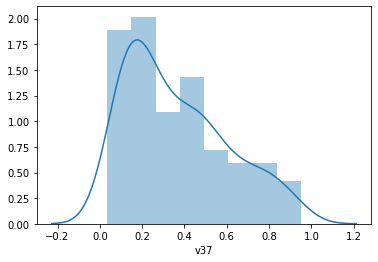

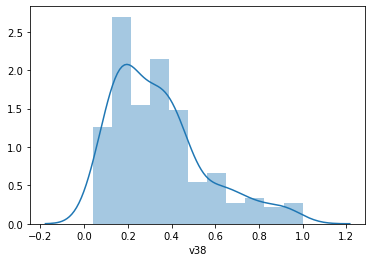

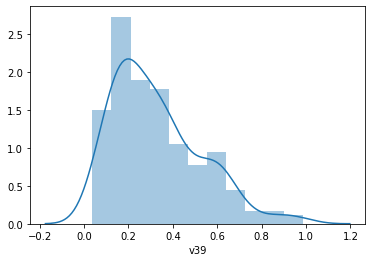

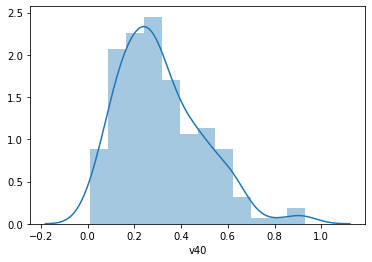

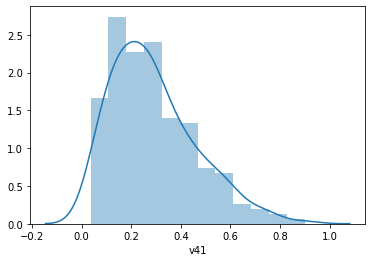

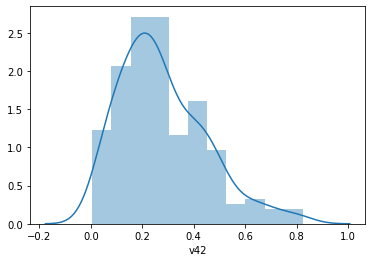

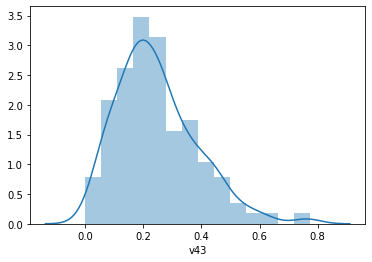

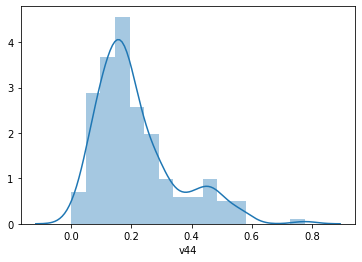

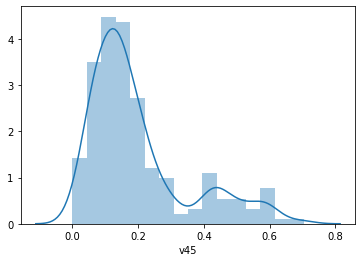

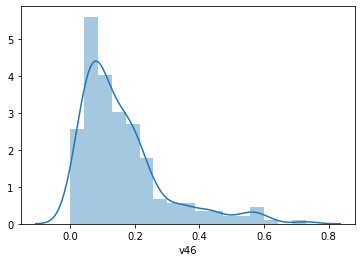

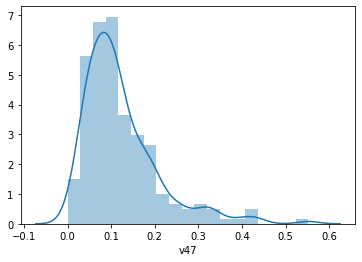

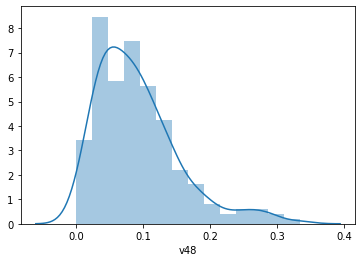

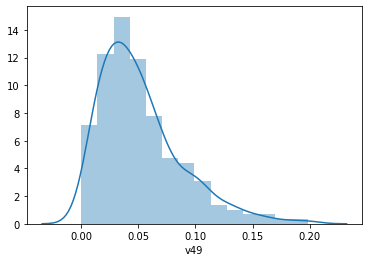

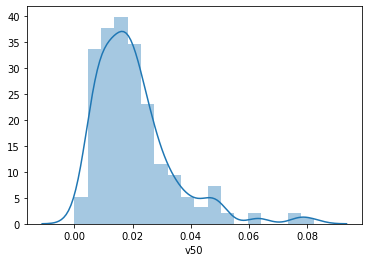

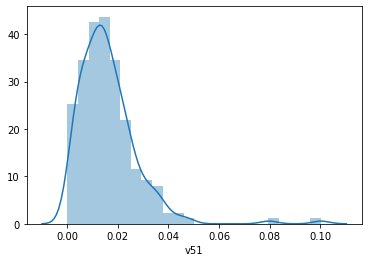

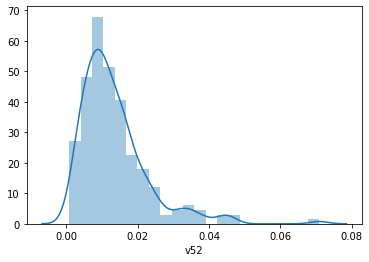

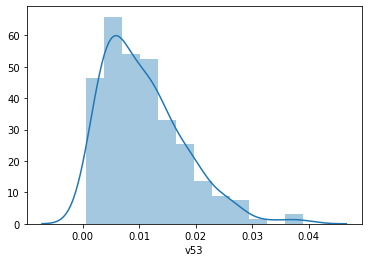

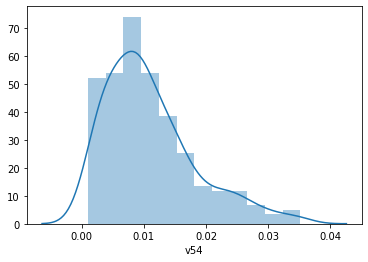

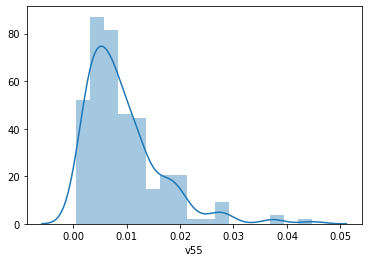

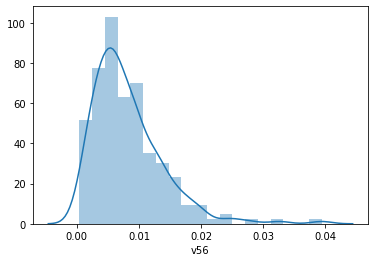

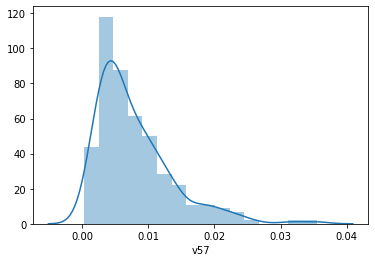

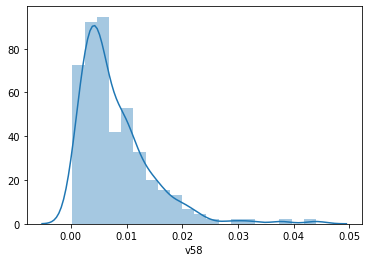

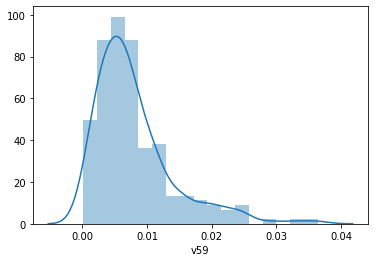

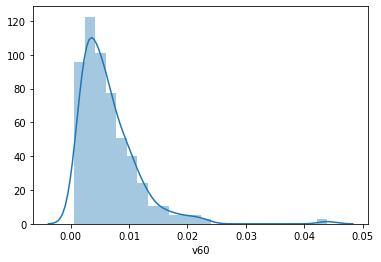

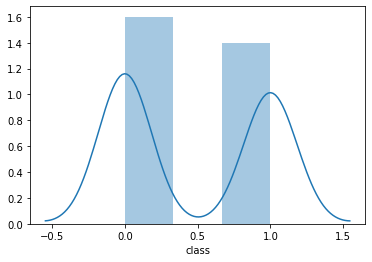

In [258]:
for i in data:
    sns.distplot(data[i])
    plt.show()
    

we can see there is some right skewness in the dat we wil reduce it usng Log normal method

In [259]:
x = data.drop(["class"], axis = 1)
y = data["class"]

In [260]:
x.shape,y.shape

((208, 60), (208,))

In [261]:
x.skew()

v1     2.131088
v2     2.155644
v3     2.652518
v4     3.401697
v5     2.018141
v6     1.248166
v7     0.970820
v8     1.481107
v9     1.633870
v10    1.281258
v11    0.987813
v12    0.588681
v13    0.736584
v14    1.022369
v15    0.763964
v16    0.694671
v17    0.654480
v18    0.525845
v19    0.283182
v20   -0.085331
v21   -0.252741
v22   -0.392289
v23   -0.594350
v24   -0.691861
v25   -0.788909
v26   -0.671580
v27   -0.627843
v28   -0.615447
v29   -0.442007
v30   -0.132390
v31    0.259797
v32    0.313420
v33    0.423864
v34    0.563296
v35    0.591654
v36    0.619868
v37    0.676994
v38    1.033366
v39    0.908835
v40    0.861280
v41    0.863526
v42    0.860110
v43    0.909317
v44    1.235086
v45    1.366839
v46    1.706674
v47    1.790155
v48    1.277722
v49    1.273385
v50    1.761714
v51    2.716060
v52    2.093976
v53    1.060572
v54    1.093090
v55    1.789946
v56    1.780805
v57    1.653090
v58    2.098330
v59    1.737506
v60    2.775754
dtype: float64

so we wil apply log transformation method to reduce skwenes of data

In [262]:
new = np.cbrt(x)

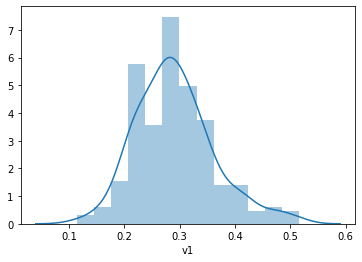

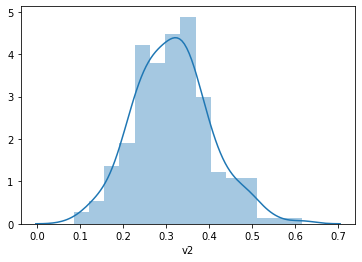

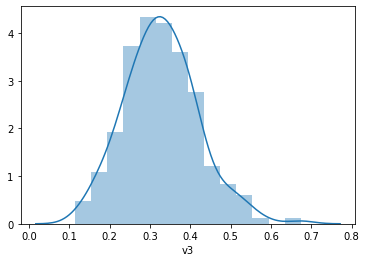

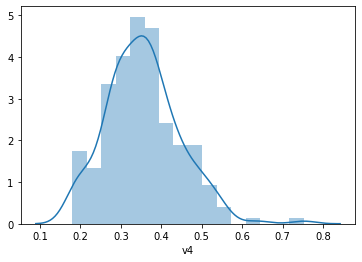

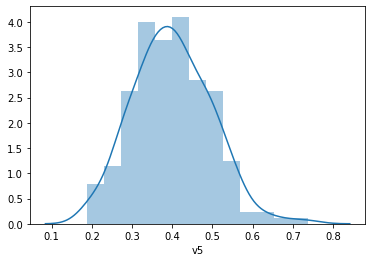

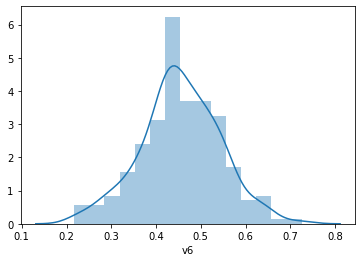

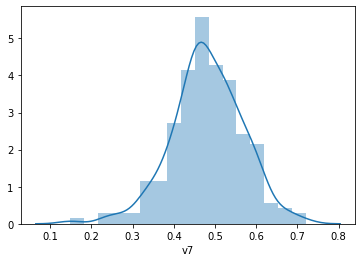

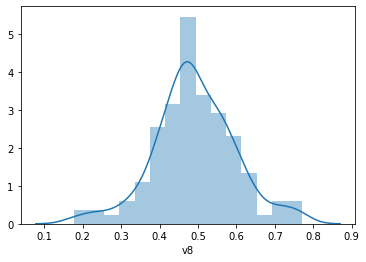

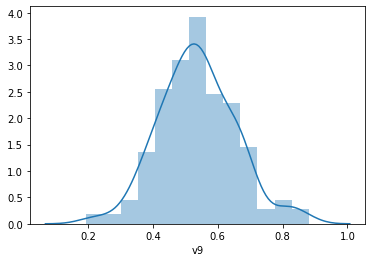

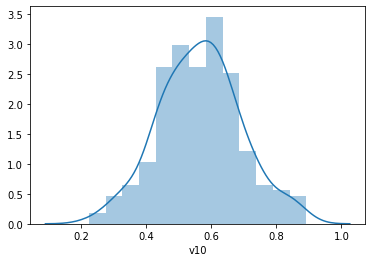

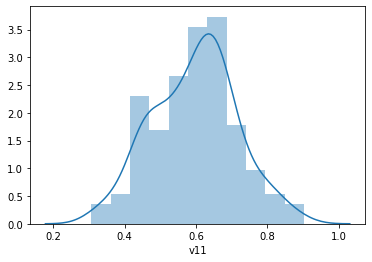

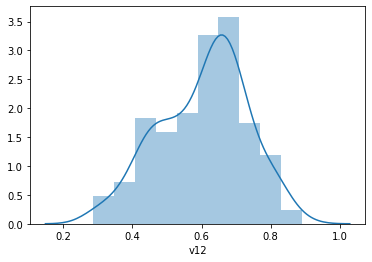

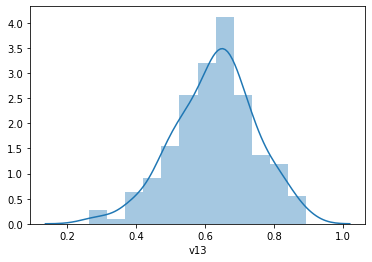

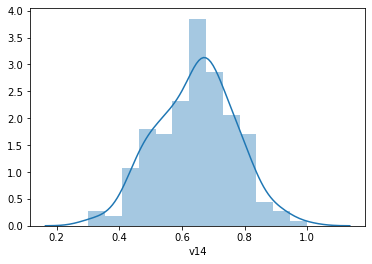

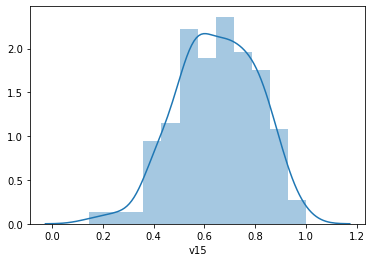

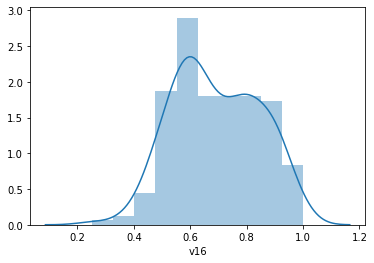

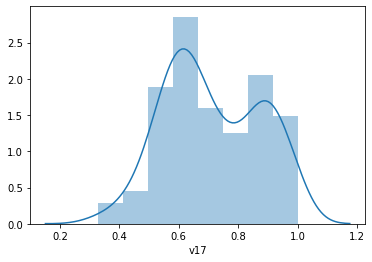

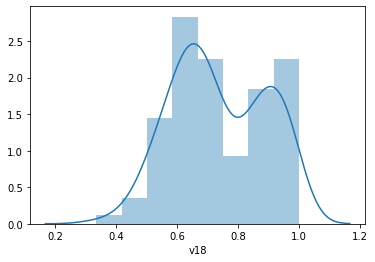

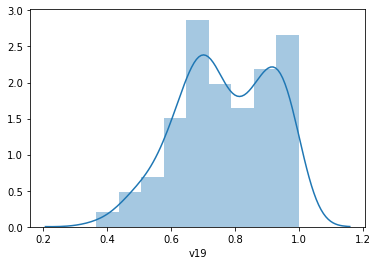

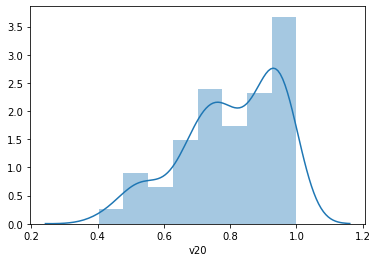

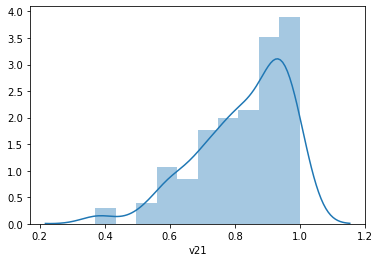

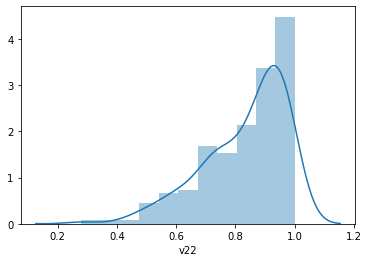

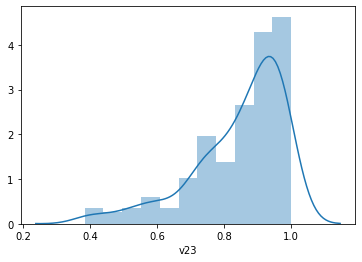

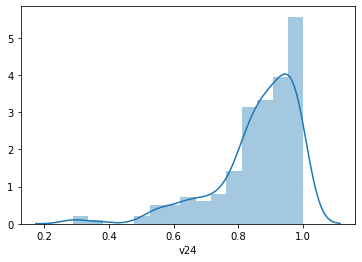

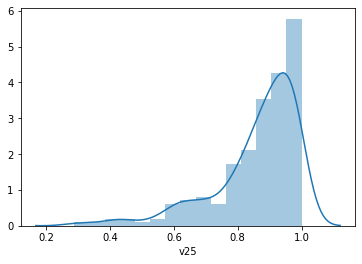

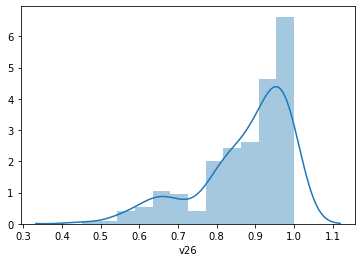

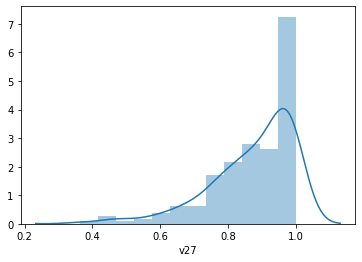

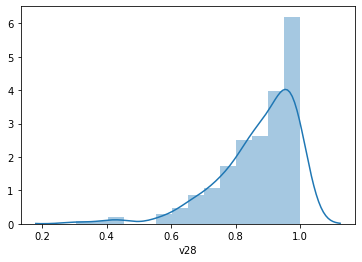

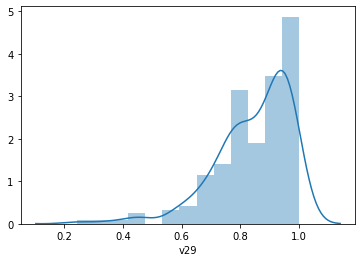

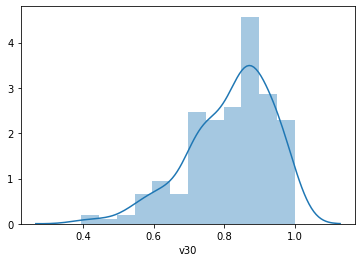

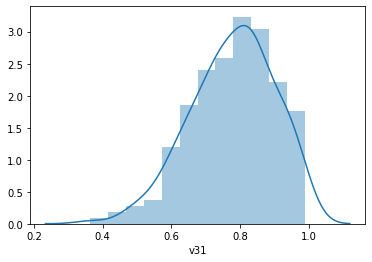

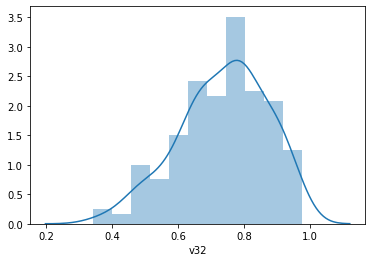

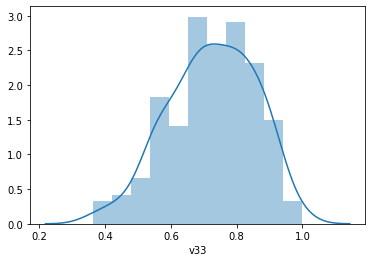

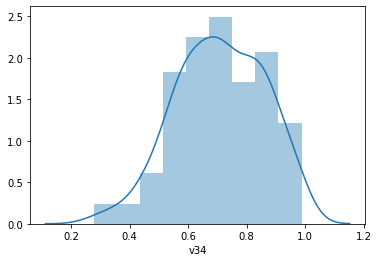

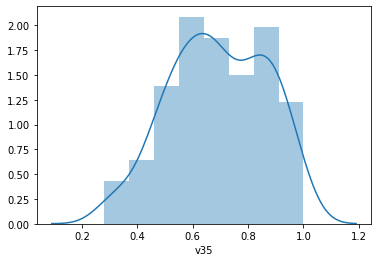

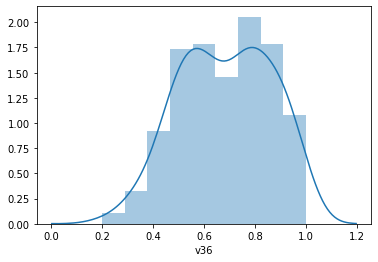

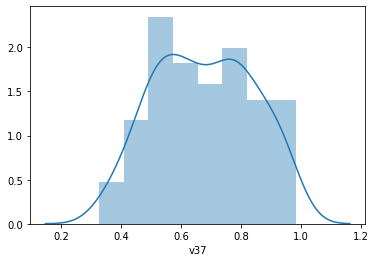

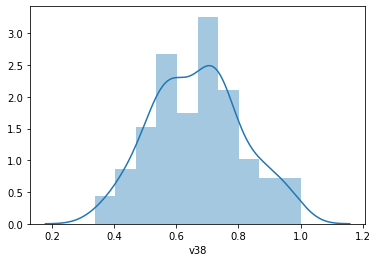

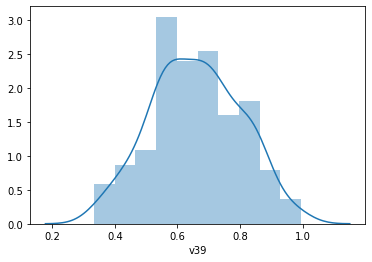

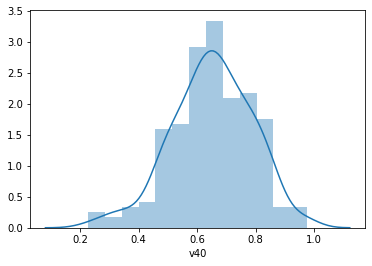

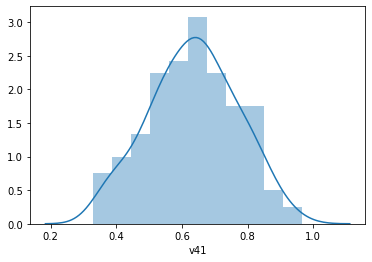

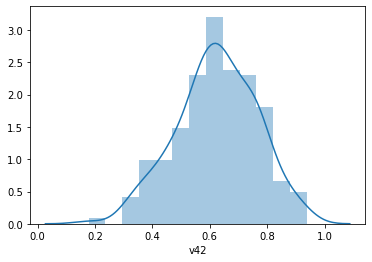

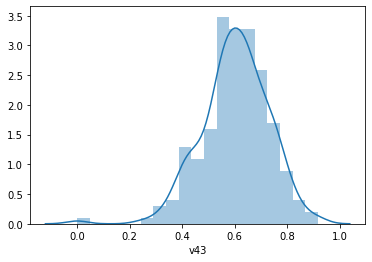

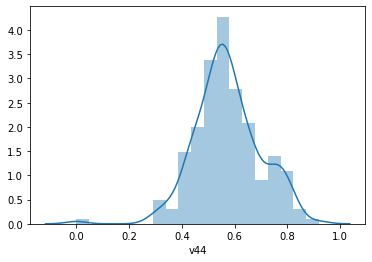

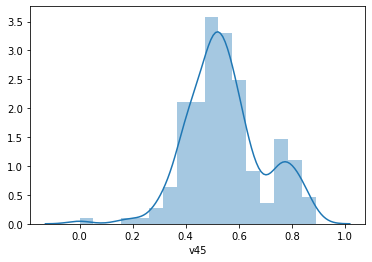

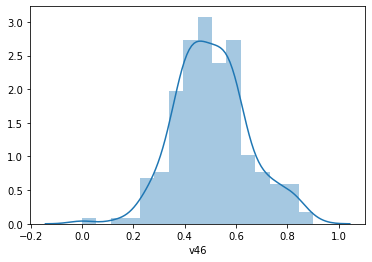

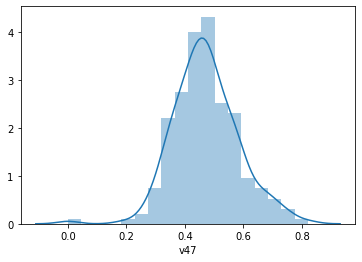

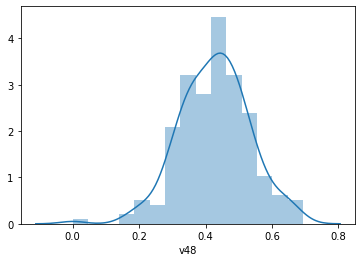

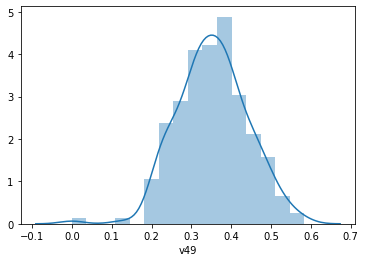

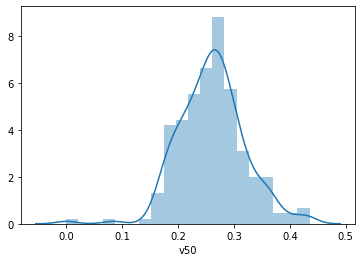

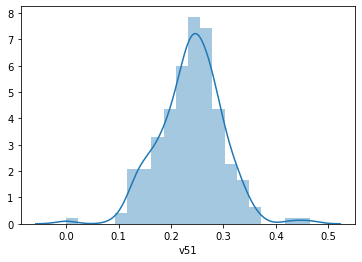

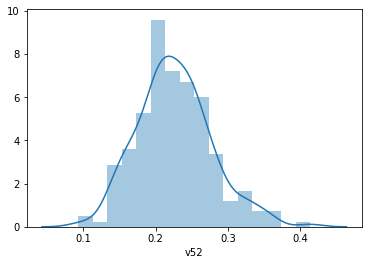

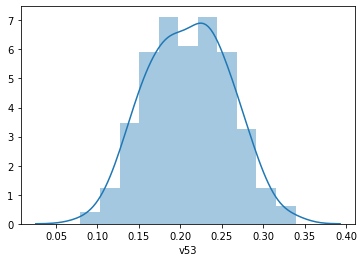

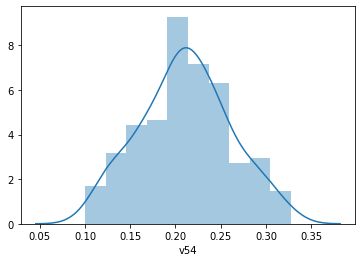

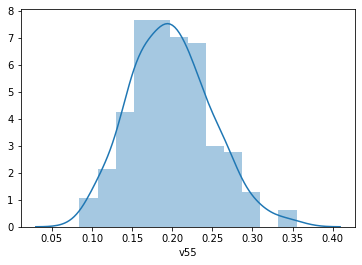

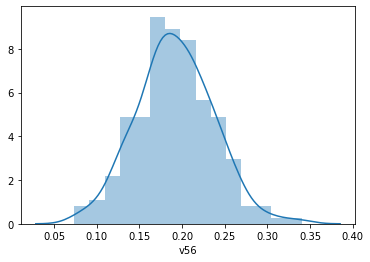

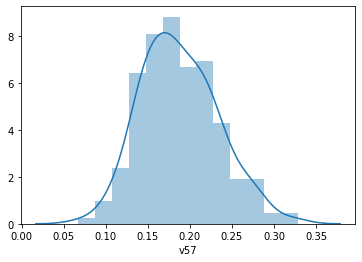

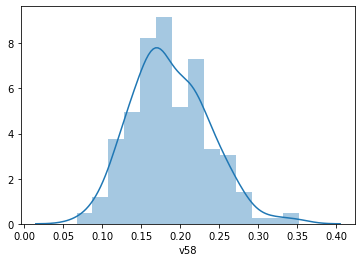

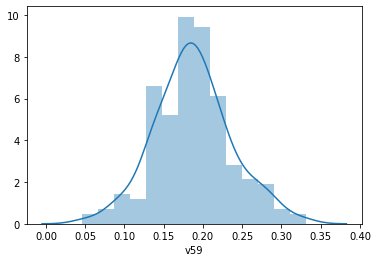

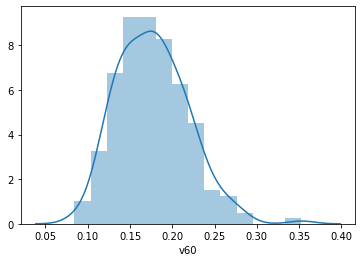

In [263]:
for i in new:
    sns.distplot(new[i])
    plt.show()

we have reduced some of the skewness lets check about outiers


In [264]:
x = new
x

,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,...,v51,v52,v53,v54,v55,v56,v57,v58,v59,v60
0,0.271442,0.333522,0.349796,0.274572,0.456930,0.461983,0.535895,0.542997,0.677444,0.595428,...,0.285209,0.139248,0.186626,0.251458,0.193098,0.255607,0.262074,0.203279,0.208008,0.147361
1,0.356478,0.373968,0.438473,0.409958,0.490902,0.636856,0.599629,0.703452,0.693615,0.659773,...,0.232079,0.203279,0.207235,0.168687,0.211045,0.267307,0.241014,0.169850,0.173248,0.163864
2,0.297007,0.387532,0.478997,0.476661,0.460101,0.610911,0.624111,0.722468,0.824159,0.852427,...,0.148881,0.285209,0.255095,0.211791,0.262074,0.290044,0.316152,0.254067,0.211791,0.198319
3,0.215443,0.257631,0.396427,0.273685,0.273685,0.332621,0.478851,0.503443,0.391051,0.501860,...,0.288850,0.229577,0.153262,0.246621,0.204083,0.193988,0.170998,0.163864,0.158740,0.227019
4,0.423954,0.405345,0.363676,0.340277,0.389300,0.401866,0.494472,0.627176,0.708999,0.763975,...,0.249867,0.145810,0.175441,0.218976,0.222398,0.114471,0.193098,0.168687,0.220358,0.211045
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.265428,0.325856,0.256116,0.260610,0.339988,0.546256,0.587520,0.553313,0.615169,0.645051,...,0.272792,0.226370,0.213997,0.270989,0.148881,0.216159,0.186626,0.225718,0.268237,0.250399
204,0.318469,0.216159,0.310031,0.383495,0.423582,0.457567,0.462607,0.466927,0.468755,0.599444,...,0.172130,0.182716,0.210294,0.238110,0.184691,0.184691,0.150369,0.147361,0.183709,0.188520
205,0.373729,0.352231,0.262074,0.307936,0.327418,0.489237,0.500932,0.490210,0.501064,0.632387,...,0.249332,0.251984,0.142604,0.172130,0.183709,0.207235,0.241014,0.239861,0.197468,0.145810
206,0.311756,0.328039,0.365931,0.393219,0.255607,0.513499,0.527164,0.482458,0.579393,0.617451,...,0.161343,0.204880,0.166310,0.232697,0.153262,0.151829,0.150369,0.199163,0.153262,0.168687


now lets check about the outliers 

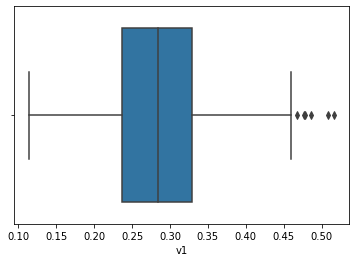

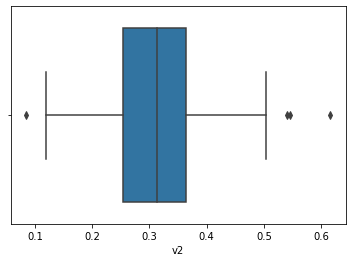

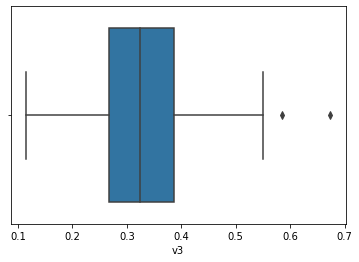

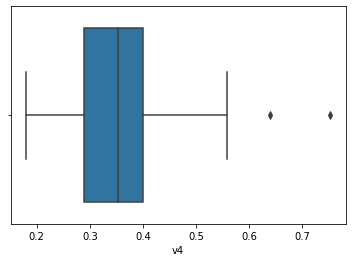

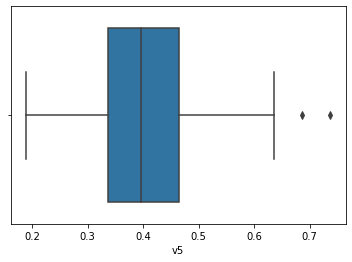

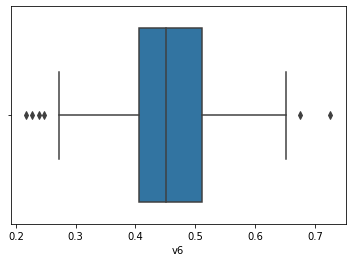

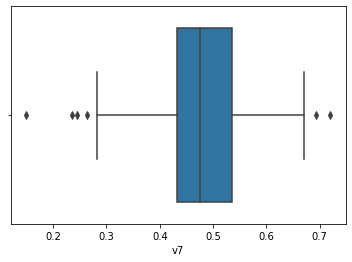

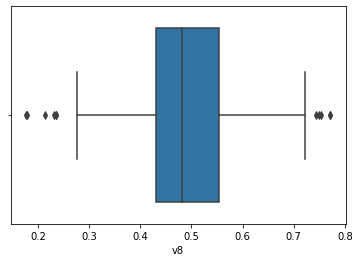

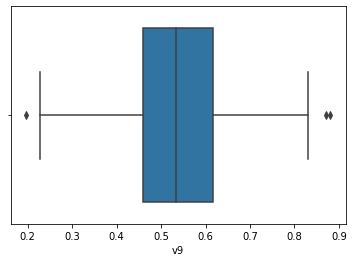

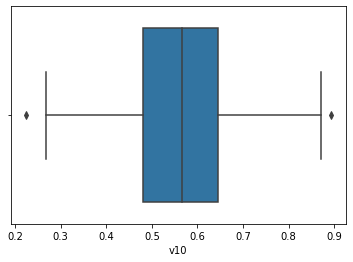

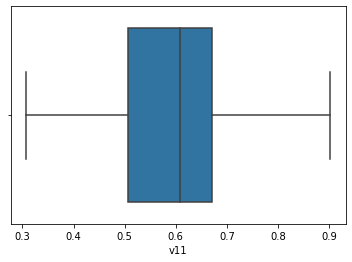

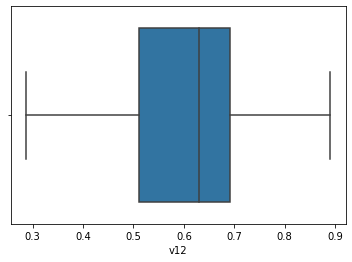

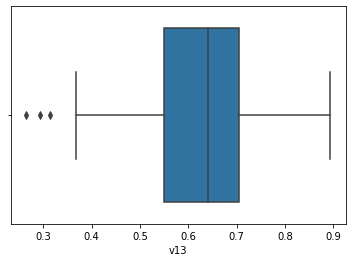

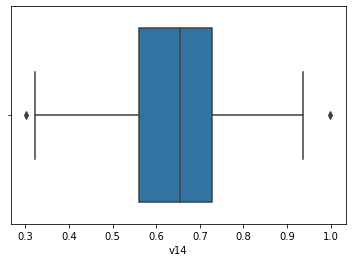

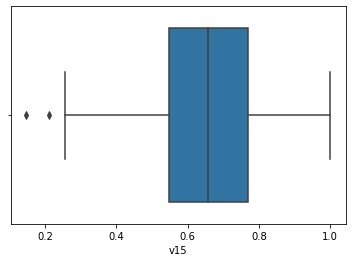

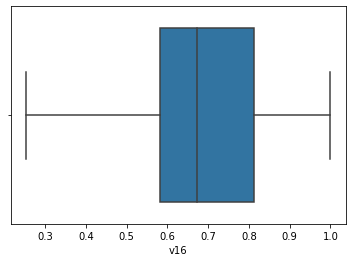

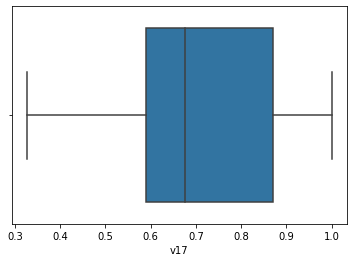

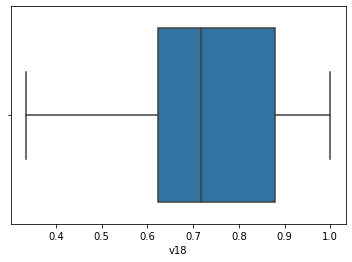

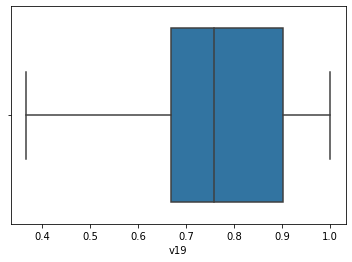

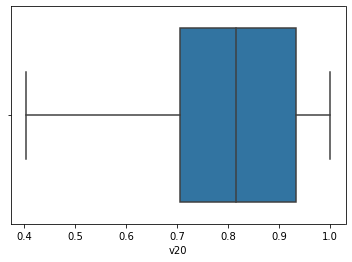

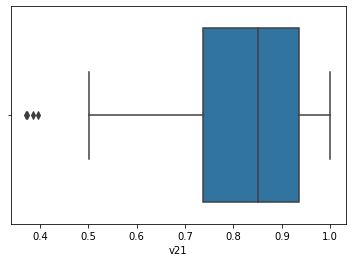

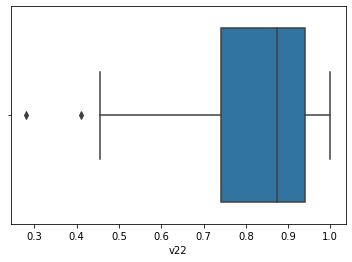

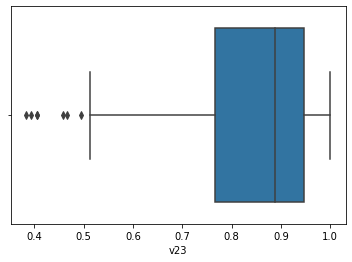

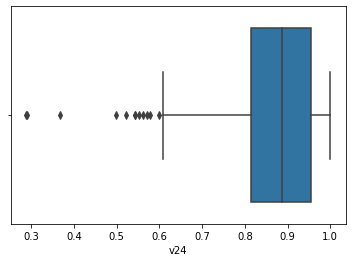

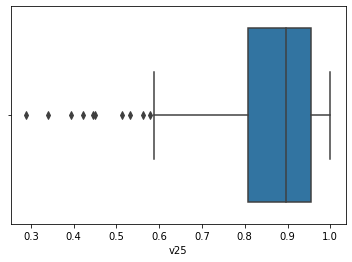

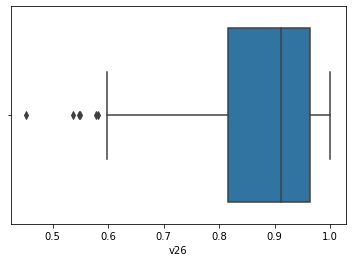

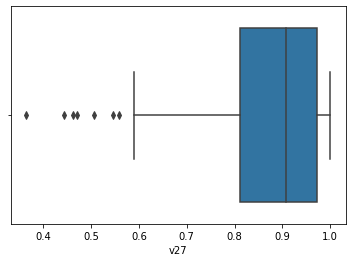

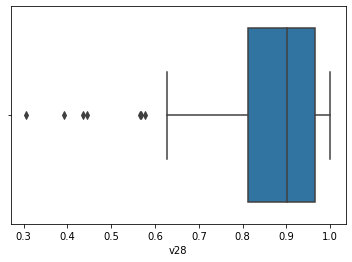

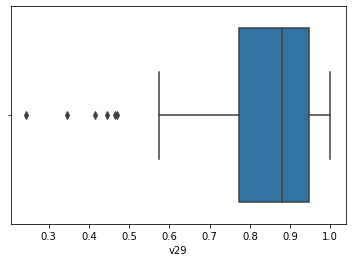

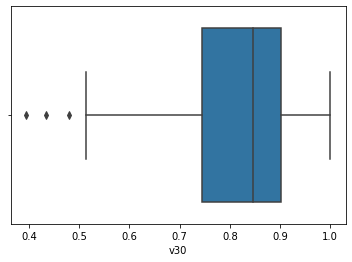

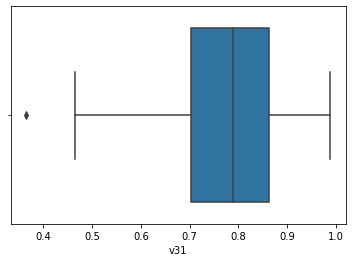

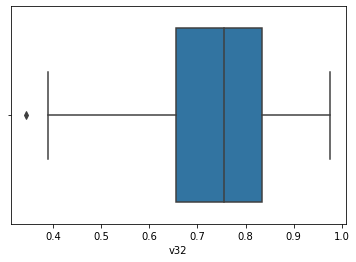

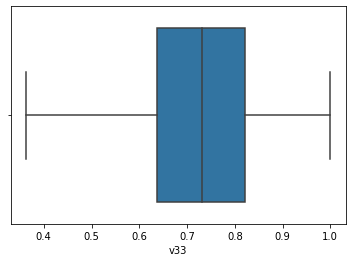

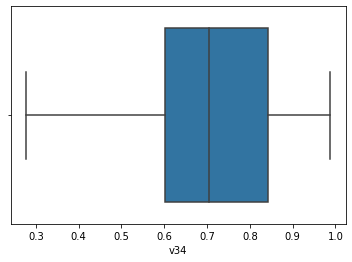

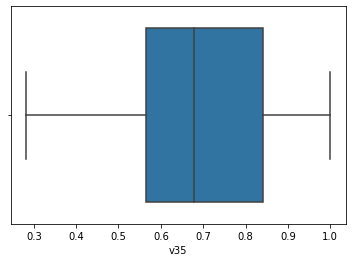

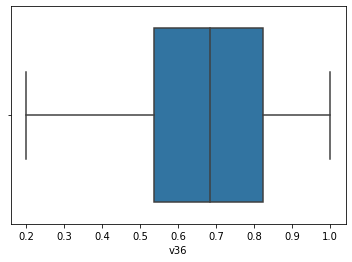

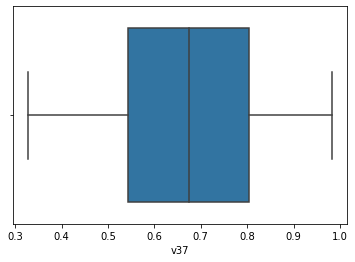

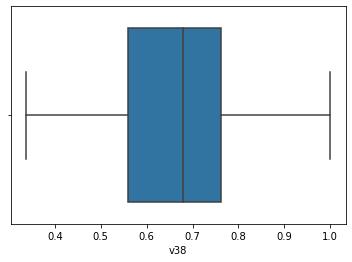

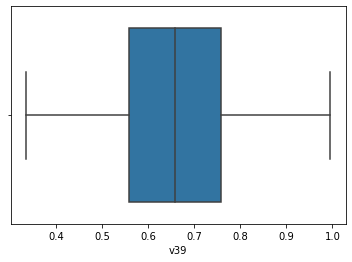

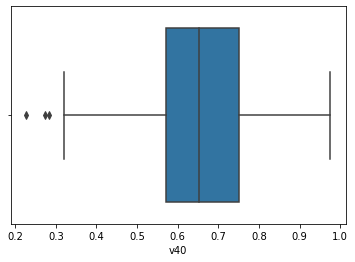

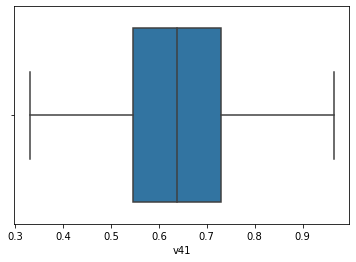

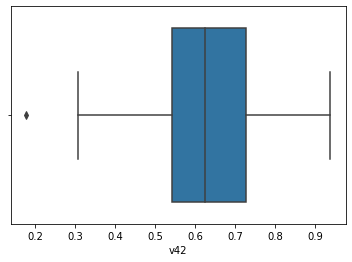

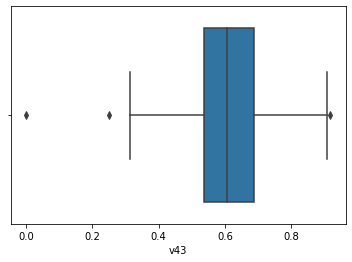

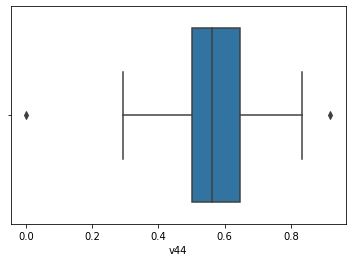

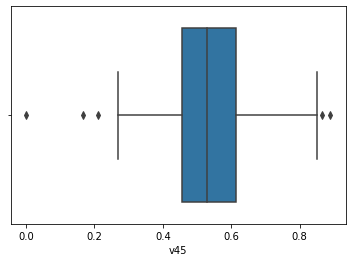

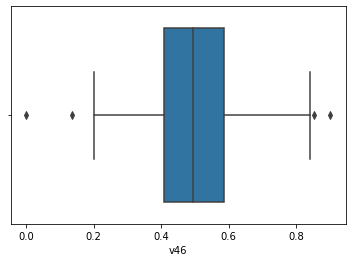

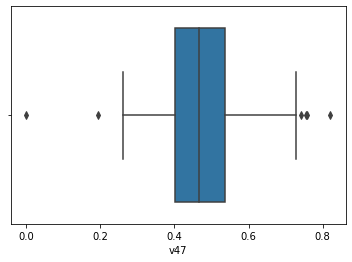

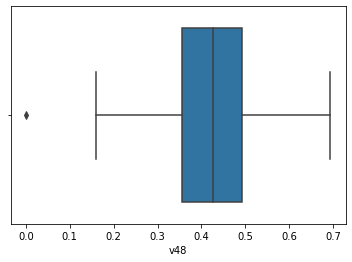

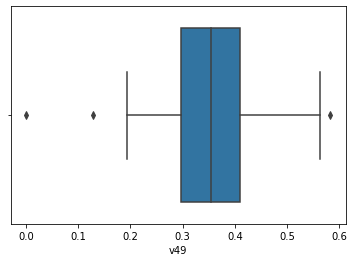

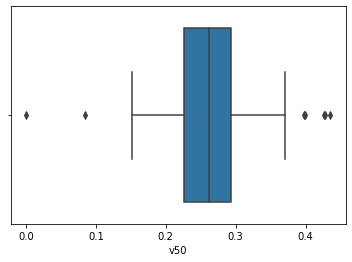

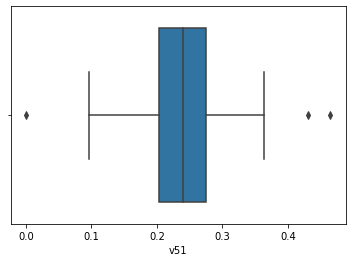

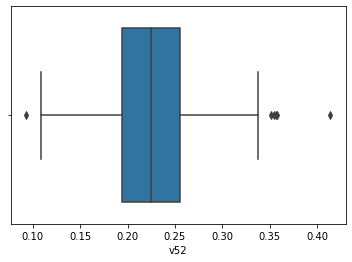

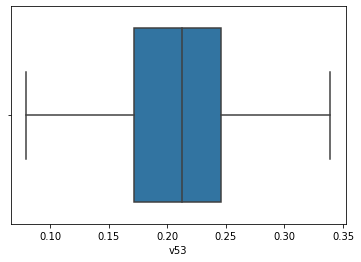

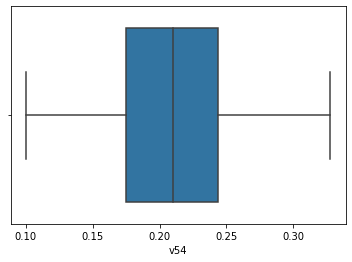

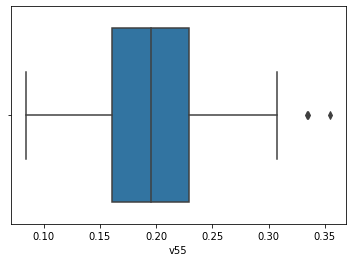

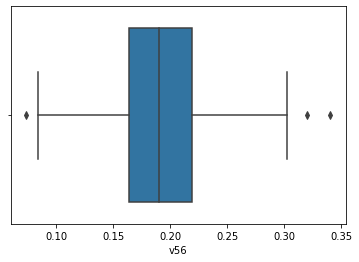

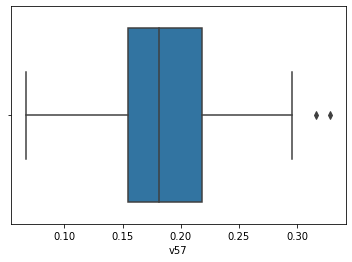

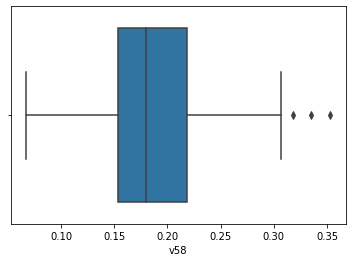

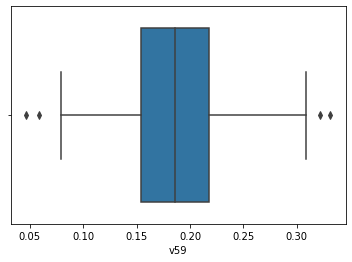

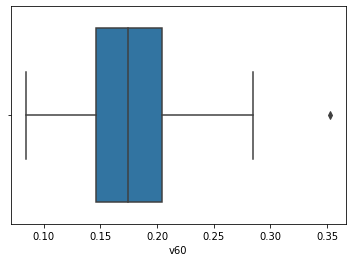

In [265]:
for i in x:
    sns.boxplot(x[i])
    plt.show()

In [266]:
from scipy import stats
x[(np.abs(stats.zscore(x)) < 3).all(axis=1)]
x


,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,...,v51,v52,v53,v54,v55,v56,v57,v58,v59,v60
0,0.271442,0.333522,0.349796,0.274572,0.456930,0.461983,0.535895,0.542997,0.677444,0.595428,...,0.285209,0.139248,0.186626,0.251458,0.193098,0.255607,0.262074,0.203279,0.208008,0.147361
1,0.356478,0.373968,0.438473,0.409958,0.490902,0.636856,0.599629,0.703452,0.693615,0.659773,...,0.232079,0.203279,0.207235,0.168687,0.211045,0.267307,0.241014,0.169850,0.173248,0.163864
2,0.297007,0.387532,0.478997,0.476661,0.460101,0.610911,0.624111,0.722468,0.824159,0.852427,...,0.148881,0.285209,0.255095,0.211791,0.262074,0.290044,0.316152,0.254067,0.211791,0.198319
3,0.215443,0.257631,0.396427,0.273685,0.273685,0.332621,0.478851,0.503443,0.391051,0.501860,...,0.288850,0.229577,0.153262,0.246621,0.204083,0.193988,0.170998,0.163864,0.158740,0.227019
4,0.423954,0.405345,0.363676,0.340277,0.389300,0.401866,0.494472,0.627176,0.708999,0.763975,...,0.249867,0.145810,0.175441,0.218976,0.222398,0.114471,0.193098,0.168687,0.220358,0.211045
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.265428,0.325856,0.256116,0.260610,0.339988,0.546256,0.587520,0.553313,0.615169,0.645051,...,0.272792,0.226370,0.213997,0.270989,0.148881,0.216159,0.186626,0.225718,0.268237,0.250399
204,0.318469,0.216159,0.310031,0.383495,0.423582,0.457567,0.462607,0.466927,0.468755,0.599444,...,0.172130,0.182716,0.210294,0.238110,0.184691,0.184691,0.150369,0.147361,0.183709,0.188520
205,0.373729,0.352231,0.262074,0.307936,0.327418,0.489237,0.500932,0.490210,0.501064,0.632387,...,0.249332,0.251984,0.142604,0.172130,0.183709,0.207235,0.241014,0.239861,0.197468,0.145810
206,0.311756,0.328039,0.365931,0.393219,0.255607,0.513499,0.527164,0.482458,0.579393,0.617451,...,0.161343,0.204880,0.166310,0.232697,0.153262,0.151829,0.150369,0.199163,0.153262,0.168687


we handled outliers lets start with model desigining and prediction

In [267]:
x.shape,y.shape

((208, 60), (208,))

In [268]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
maxAccu = 0
Maxran = 0

for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.30, random_state = i)
    LR = LogisticRegression()
    LR.fit(x_train,y_train)
    predf = LR.predict(x_test)
    acc = accuracy_score(y_test, predf)
    if acc>maxAccu:
        maxAccu = acc
        Maxran = i
print("Best score is:", maxAccu, "best random is :", Maxran)

Best score is: 0.8888888888888888 best random is : 37


we found that best randon state is 37

now creating train and spit

In [269]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.30, random_state = 37)

In [276]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
LR = LogisticRegression()
D = DecisionTreeClassifier()
S = SVC()
K = KNeighborsClassifier()
R = RandomForestClassifier()

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


In [279]:
models = [LR,D,S,K,R]
for i in models:
    i.fit(x_train,y_train)
    prediction = i.predict(x_test)
    print(accuracy_score(y_test, prediction))
    print(confusion_matrix(y_test, prediction))
    print(classification_report(y_test, prediction))
    print("\n")
    


0.8888888888888888
[[37  2]
 [ 5 19]]
              precision    recall  f1-score   support

           0       0.88      0.95      0.91        39
           1       0.90      0.79      0.84        24

    accuracy                           0.89        63
   macro avg       0.89      0.87      0.88        63
weighted avg       0.89      0.89      0.89        63



0.746031746031746
[[31  8]
 [ 8 16]]
              precision    recall  f1-score   support

           0       0.79      0.79      0.79        39
           1       0.67      0.67      0.67        24

    accuracy                           0.75        63
   macro avg       0.73      0.73      0.73        63
weighted avg       0.75      0.75      0.75        63



0.8412698412698413
[[37  2]
 [ 8 16]]
              precision    recall  f1-score   support

           0       0.82      0.95      0.88        39
           1       0.89      0.67      0.76        24

    accuracy                           0.84        63
   macro av

we are getting huge accuracy score of 88% lets check with cross validation

In [272]:
from sklearn.model_selection import cross_val_score

In [281]:
c_models = [LR, D, S, K, R]
for j in c_models:
    scr = cross_val_score(i, x, y, cv=5)
    print("cross val score is",scr.mean())

cross val score is 0.697444831591173
cross val score is 0.7167247386759582
cross val score is 0.6736353077816493
cross val score is 0.7074332171893147
cross val score is 0.702787456445993


If you comapare the difference between accuracy score and cross validation score then we will see what is best model

If we observe the difference between cross val score and accurcy score and you will know the best model

model        accuracy     cvscore   difference
LR           0.88         0.69      0.19
D            0.74         0.71      0.03
S            0.84         0.67      0.17
K            0.77         0.70      0.07
R            0.87         0.70      0.17

As we can see there is a little difference in Decision tree it is best model as it does not contain any undefitting or over fitting

now we will do hyper parameter tuning for improving model

In [282]:
from sklearn.model_selection import GridSearchCV

parameters = {
    "max_depth" : np.arange(2,15),
    "criterion" : ["gini", "entropy"]
}

In [283]:
Gsv = GridSearchCV(DecisionTreeClassifier(), parameters, cv=5)

In [284]:
Gsv.fit(x_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                   

In [285]:
Gsv.best_params_

{'criterion': 'gini', 'max_depth': 9}

In [288]:
gpred = Gsv.best_estimator_.predict(x_test)


In [289]:
accuracy_score(y_test, gpred)

0.7936507936507936

see with hyper parameter tuning accuracy increased from 74 to 79 

In [293]:
import joblib

joblib.dump(Gsv.best_estimator_,"sonarprediction.pk1")

['sonarprediction.pk1']